# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">یافتن contour در تصویر</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">در OpenCV، یافتن خطوط مانند یافتن شی سفید از پس زمینه سیاه است. بنابراین به یاد داشته باشید، شیء یافت شده باید سفید و پس زمینه باید سیاه باشد.
<br/>
خطوط یک ابزار مفید برای تجزیه و تحلیل شکل و تشخیص و تشخیص اشیا هستند.
</div>

``contours, hierarchy = cv2.findContours(image, mode, method)``

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
آرگومانهای این تابع به ترتیب اول تصویر منبع، دوم حالت بازیابی کانتور، سوم روش تقریب کانتور است.
</div>

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/shapes.png', 0)
ret, thresh = cv2.threshold(image, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [21]:
for contour in contours:
    print(contour.shape)

(24, 1, 2)
(134, 1, 2)
(146, 1, 2)
(17, 1, 2)
(117, 1, 2)
(4, 1, 2)


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ترسیم خروجی با روش رسم چند ضلعی در</div>

[07-Drawing-and-annotating.ipynb](https://nbviewer.org/github/Alireza-Akhavan/class.vision/blob/master/07-Drawing-and-annotating.ipynb)

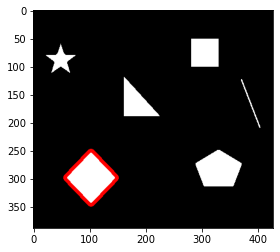

In [44]:
# draw first contour
bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.polylines(bgr_image, [contours[0]], True, (0,0,255), 5)
plt.imshow(bgr_image[...,::-1])

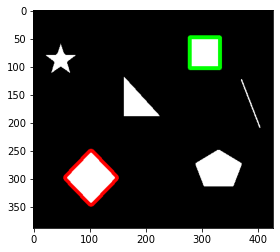

In [45]:
# draw last contour
cv2.polylines(bgr_image, [contours[-1]], True, (0,255,0), 5)
plt.imshow(bgr_image[...,::-1])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ترسیم با تابع `drawContours` در opencv</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
ترسیم همه‌ی contour ها</div>

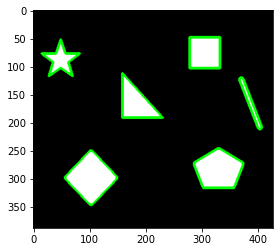

In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/shapes.png', 0)
ret, thresh = cv2.threshold(image, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)


all_contours = cv2.drawContours(bgr_image, contours, -1, (0,255,0), 3)
plt.imshow(all_contours)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
رسم یک کانتور با تابع drawContours</div>

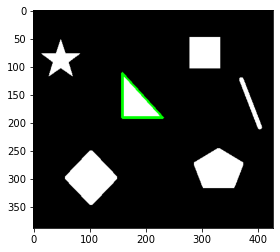

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/shapes.png', 0)
ret, thresh = cv2.threshold(image, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# as an example, third contour
cnt = contours[3]

third_contour = cv2.drawContours(bgr_image, [cnt], -1, (0,255,0), 3)
plt.imshow(third_contour)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
و یا ...</div>

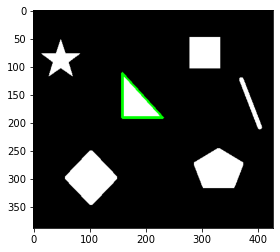

In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/shapes.png', 0)
ret, thresh = cv2.threshold(image, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)


third_contour = cv2.drawContours(bgr_image, contours, 3, (0,255,0), 3)
plt.imshow(third_contour)

## Contour Approximation Method 

cv2.CHAIN_APPROX_NONE:
contours[0].shape: (606, 1, 2) so number of points for the contour: 606
-----
cv2.CHAIN_APPROX_SIMPLE:
contours[0].shape: (4, 1, 2) so number of points for the contour: 4


Text(0.5, 1.0, 'CHAIN_APPROX_SIMPLE')

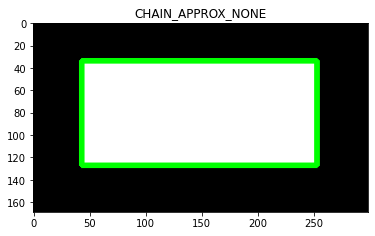

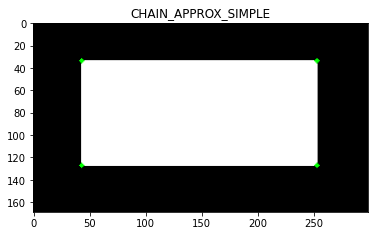

In [87]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/rectangle.png', 0)
ret, thresh = cv2.threshold(image, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

print("cv2.CHAIN_APPROX_NONE:")
print("contours[0].shape: {} so number of points for the contour: {}".format(contours[0].shape, len(contours[0])))

bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for point in contours[0]:
    cv2.circle(bgr_image, (point[0][0], point[0][1]), 2, (0,255,0), -1)
plt.imshow(bgr_image[...,::-1]); plt.title('CHAIN_APPROX_NONE')
print('-'*5)


contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("cv2.CHAIN_APPROX_SIMPLE:")
print("contours[0].shape: {} so number of points for the contour: {}".format(contours[0].shape, len(contours[0])))

bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for point in contours[0]:
    cv2.circle(bgr_image, (point[0][0], point[0][1]), 2, (0,255,0), -1)
    
plt.figure(); plt.imshow(bgr_image[...,::-1]); plt.title('CHAIN_APPROX_SIMPLE')


https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html